# "Fourier Transform of Sound"

Fourier Transforms are a fundamental part of mathematics and its applications can be extended to far more than just math. In case in point: this project. 

The goal here is to calculate the Fourier Transform of waveforms from different sources. 

To get the waveforms, you need a sound file of which to take the waveform from. 

We will start first with the trumpet. Here's the download cell for the waveform of a trumpet. We will need this download before moving on:

In [1]:
def _download(filename):
    """
    Download data file from the Internet and save it in the working directory
    """
    import os
    import urllib.request as url
    if not os.path.isfile(filename):
        url.urlretrieve(f"http://www.pitt.edu/~djn23/phys1321/{filename}", filename)
        
_download("trumpet.txt")


We'll also need the imports for this project as well:

In [2]:
from IPython import display #Allows waveforms to be displayed
import scipy.fftpack as fftpack #allows Fourier Transforms to be taken
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

The trumpet in this download file plays a sound at note C$_5$ (with a frequency of 523.251 Hz). The contents of the file will be loaded into an array so that it can be easily plotted. 

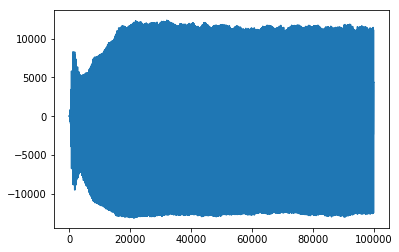

In [3]:
with open("trumpet.txt") as file:
    trumpet = np.loadtxt("trumpet.txt")
    plt.plot(trumpet)
    plt.show()
    
import IPython.display as display
display.Audio(trumpet, rate = 44100)


This audio sample was recorded at 44,100 samples/second which is typically the standard frequency for audio files to be recorded. 

You can actually try adjusting the rate to here different pitches of the trumpet! (Keep in mind that the rate needs to be at 44,100 before moving on to the next part. 

With this, the Fourier Transform can be found. Since we don't know what the actual function is for this graph, we can use the array to redefine what the Fourier Transform will look like. For our purposes, we are going to plot the coefficients as a summation of the array. Mathmatically, this is represented by the Discrete Fourier Transform function:

$$c_k = N \gamma_k = \sum_{n=0}^{N-1}y_n\,\exp\bigg(-\mathrm{i}\frac{2\pi kn}{N}\bigg)\,.$$

where 
- $c_k$ is the coefficient
- $N$ is the array size
- $y_n$ is the actual array

and the exponential function is the combination of both sine and cosine waves to replicate the waveform above. 

The power spectrum of the Fourier coefficients is the plot of the signal's power which is measured in energy per unit time. This spectrum has values that fall within bins that catagorize them according to their frequencies. 

In the trumpets case, the particular note that is played at 44,100 Hz has peaks in this spectrum that occur every 523.523 Hz. To show this, the power spectrum (which is given as $|c_k|^2$) will be ploted for a range of 0 to 4,000 Hz.

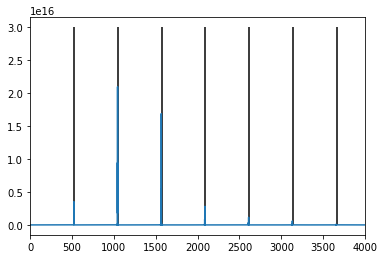

In [8]:
c = fftpack.fft(trumpet) #find fourier transform coefficients
power_spectrum = abs(c)**2
x = np.linspace(0, 44100, len(c)) #takes step size of the length of c
plt.plot(x, power_spectrum)
plt.vlines(523.251, 0, 3e16) #helps visualize the spacing between every gap

plt.vlines(2*523.251, 0, 3e16)
plt.vlines(3*523.251, 0, 3e16)
plt.vlines(4*523.251, 0, 3e16)
plt.vlines(5*523.251, 0, 3e16)
plt.vlines(6*523.251, 0, 3e16)
plt.vlines(7*523.251, 0, 3e16)

plt.xlim(0, 4000) #frequency range
plt.show()


Here, we can see that every 523.523 Hz, there is in fact a binning for the frequencies. This seperation is known as the Harmonics of the waveform. Here is the same plot below without the vlines to emhpasize spaing between the Harmonics. This next plot empahsizes how the frequencies were binned. 

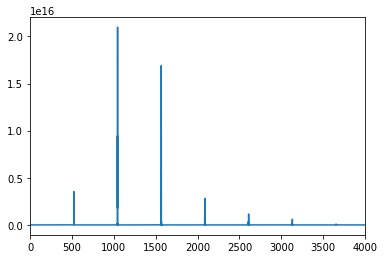

In [10]:
c = fftpack.fft(trumpet)
power_spectrum = abs(c)**2
x = np.linspace(0, 44100, len(c))
plt.plot(x, power_spectrum)

plt.xlim(0, 4000)
plt.show()


Now let's take a look at a arugably more complex but fun waveform: the first second of the Star Wars opening theme. 

As before with the trumpet, here is the download link for the first eight seconds of the theme song:

In [11]:
_download("StarWars.wav")
display.Audio("StarWars.wav")

We are going to finding out what chord is being played at the very first second of this clip, so it needs to be trimed down. The silence at the very beginning of the clip must also be cut out. Once this is achieved, we can plot the waveform.

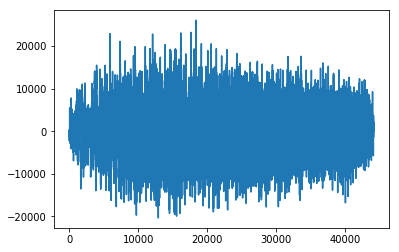

In [13]:
from scipy.io.wavfile import read as wavread
rate, data = wavread("StarWars.wav")
    
first_second = data[19000:63100]
plt.plot(first_second)
plt.show()

display.Audio(first_second, rate = 44100)


With this, the power spectrum of the waveform can be taken and plotted. In order to determine what chord is being played, we need to see what bin contains the most amount of frequencies. The plot will come with labels for each note and will point to the biggest one as well. 

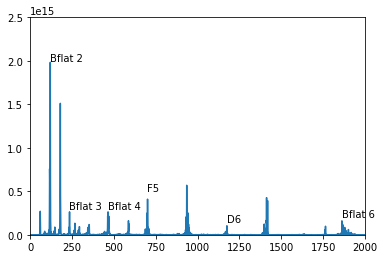

In [14]:
a = fftpack.fft(first_second)
b = abs(a)**2
c = np.linspace(0, 44100, len(a))

plt.text(116.5409, 2.0e15, "Bflat 2", fontsize = 10)
plt.text(233.0819, 0.3e15, "Bflat 3", fontsize = 10)
plt.text(698.4565, 0.5e15, "F5", fontsize = 10)
plt.text(466.1638, 0.3e15, "Bflat 4", fontsize = 10)
plt.text(1864.655, 0.2e15, "Bflat 6", fontsize = 10)
plt.text(1174.659, 0.15e15, "D6", fontsize = 10)

plt.plot(c, b)
plt.xlim(0, 2000)
plt.ylim(0, 2.5e15)
plt.show()


From this plot, it is fairly noticable that the chord that is the most frequent is B$\flat_2$. 

# To Summarize:

In this project, two fourier transforms of both the first second of the Star Wars theme and a regular trumpet were taken and their coefficients were plotted along with the waveforms to break down the sound. The harmonics and notes were also found for their respective waveforms. 

This project shows a broader understanding of both mathematical and physical concepts that have many implications for a wide variety of further applications using everyday things such as a trumpet sounds. 